# Sentiment Classification and Evaluation of Product Reviews from Amazon
Content


1.   Data preprocessing.
      *   Tokenization (optional: experiment with lemmatization of the irregular verbs).
      *   Compile the type list.
      *   Conduct the one-hot encoding.
      *   Compile the training dataset and the testing dataset.

2.   Set up the baseline and build the classifier.
      *   The baseline model: tokenized only by spaces.
      *   Model A-D: apply the adjusted data preprocessing methods.

3.   Evaluate the classifier.
      *   Compute the accuracy, precision, and recall value.
      *   Inspect the weights.







# The Baseline Model and Data Preprocessing

In [ ]:
# Baseline model (tokenized only by spaces)
import numpy as np
import matplotlib.pyplot as plt

# Import the reviews.
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

# Create lists.
reviews = []
sentiment_ratings = []
product_types = []
helpfulness_ratings = []

# Split the text into four categories (reviews, sentiment ratings, product types, and helpfulness ratings) and restore them in separate lists.
with open('Compiled_Reviews.txt') as f:
    for line in f.readlines()[1:]:
        fields = line.rstrip().split('\t')
        reviews.append(fields[0])
        sentiment_ratings.append(fields[1])
        product_types.append(fields[2])
        helpfulness_ratings.append(fields[3])

from collections import Counter
import re

# Tokenize the review only by spaces.
token_def = re.compile("[^ ]+")
tokenized_sents = [token_def.findall(txt) for txt in reviews]

# Restore the tokens in the list.
tokens = []
for s in tokenized_sents:
      tokens.extend(s)

# Group the tokens by type and frequency in a dictionary, and sort the items by frequency in a descending order.
counts = Counter(tokens)
so = sorted(counts.items(), key = lambda item: item[1], reverse = True)
# Unpack the sorted dictionary and retrieve the list of keys (i.e., word types) only.
so = list(zip(*so))[0]
# Select the first 5000 words to compile the type_list.
type_list = so[0:5000]

# Conduct the one-hot encoding:
# Create a 36548 x 5000 matrix of zeros.
M = np.zeros((len(reviews), len(type_list)))
# Iterate over the reviews.
for i, rev in enumerate(reviews):
    # Tokenise the current review:
    tokens = token_def.findall(rev)
    # Iterate over the words in the type_list:
    for j, t in enumerate(type_list):
        # If the current word j occurs in the current review i then set the matrix element at i, j to be one. Otherwise leave as zero.
        if t in tokens:
              M[i,j] = 1

# Randomly select 80 percent of the reviews as training dataset, and the remaining 20 percent as testing dataset.
train_ints = np.random.choice(len(reviews), int(len(reviews) * 0.8), replace=False)
test_ints = list(set(range(0, len(reviews))) - set(train_ints))
M_train = M[train_ints,]
M_test = M[test_ints,]
sentiment_train = [sentiment_ratings[i] for i in train_ints]
sentiment_test = [sentiment_ratings[i] for i in test_ints]

--2025-01-15 22:18:07--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22322605 (21M) [text/plain]
Saving to: ‘Compiled_Reviews.txt.1’

Compiled_Reviews.tx 100%[===================>]  21.29M   110MB/s    in 0.2s    

2025-01-15 22:18:08 (110 MB/s) - ‘Compiled_Reviews.txt.1’ saved [22322605/22322605]



# Optional: experiment with the lemmatization of irregular verbs

In [ ]:
# Lists of irregular verbs, the corresponding past tense and past participle for lemmatization (some elements in the list of verbs are repeted in order to match the index to other two lists).
verbs = [
    'arise', 'be', 'be', 'bear', 'beat', 'begin', 'bend', 'bet', 'bite', 'blow', 'break',
    'bring', 'build', 'buy', 'catch', 'choose', 'come', 'cost', 'cut', 'do', 'draw',
    'drink', 'drive', 'eat', 'fall', 'feel', 'fight', 'find', 'fly', 'forget', 'get', 'get',
    'give', 'go', 'grow', 'hang', 'have', 'hear', 'hide', 'hit', 'hold', 'keep',
    'know', 'learn', 'learn', 'leave', 'lend', 'let', 'lie', 'light', 'light', 'lose', 'make', 'mean',
    'meet', 'pay', 'put', 'read', 'ride', 'ring', 'rise', 'run', 'say', 'see',
    'sell', 'send', 'set', 'sew', 'shake', 'shed', 'shine', 'shoot', 'show', 'shut',
    'sing', 'sink', 'sit', 'sleep', 'slide', 'speak', 'spend', 'spin', 'stand', 'steal',
    'stick', 'sting', 'stink', 'stride', 'strike', 'swim', 'take', 'teach', 'tear', 'tell',
    'think', 'throw', 'understand', 'wake', 'wear', 'weave', 'win', 'write'
]

past_tense = [
    'arose', 'was', 'were', 'bore', 'beat', 'began', 'bent', 'bet', 'bit', 'blew', 'broke',
    'brought', 'built', 'bought', 'caught', 'chose', 'came', 'cost', 'cut', 'did', 'drew',
    'drank', 'drove', 'ate', 'fell', 'felt', 'fought', 'found', 'flew', 'forgot', 'got', 'got',
    'gave', 'went', 'grew', 'hung', 'had', 'heard', 'hid', 'hit', 'held', 'kept',
    'knew', 'learned', 'learnt', 'left', 'lent', 'let', 'lay', 'lit', 'lighted', 'lost', 'made', 'meant',
    'met', 'paid', 'put', 'read', 'rode', 'rang', 'rose', 'ran', 'said', 'saw',
    'sold', 'sent', 'set', 'sewed', 'shook', 'shed', 'shone', 'shot', 'showed', 'shut',
    'sang', 'sank', 'sat', 'slept', 'slid', 'spoke', 'spent', 'spun', 'stood', 'stole',
    'stuck', 'stung', 'stank', 'strode', 'struck', 'swam', 'took', 'taught', 'tore', 'told',
    'thought', 'threw', 'understood', 'woke', 'wore', 'wove', 'won', 'wrote'
]

past_participle = [
    'arisen', 'been', 'been', 'borne', 'beaten', 'begun', 'bent', 'bet', 'bitten', 'blown', 'broken',
    'brought', 'built', 'bought', 'caught', 'chosen', 'come', 'cost', 'cut', 'done', 'drawn',
    'drunk', 'driven', 'eaten', 'fallen', 'felt', 'fought', 'found', 'flown', 'forgotten', 'gotten', 'got',
    'given', 'gone', 'grown', 'hung', 'had', 'heard', 'hidden', 'hit', 'held', 'kept',
    'known', 'learned', 'learnt', 'left', 'lent', 'let', 'lain', 'lit', 'lighted', 'lost', 'made', 'meant',
    'met', 'paid', 'put', 'read', 'ridden', 'rung', 'risen', 'run', 'said', 'seen',
    'sold', 'sent', 'set', 'sewn', 'shaken', 'shed', 'shone', 'shot', 'shown', 'shut',
    'sung', 'sunk', 'sat', 'slept', 'slid', 'spoken', 'spent', 'spun', 'stood', 'stolen',
    'stuck', 'stung', 'stunk', 'stridden', 'struck', 'swum', 'taken', 'taught', 'torn', 'told',
    'thought', 'thrown', 'understood', 'woken', 'worn', 'woven', 'won', 'written'
]


# Model A - D and Data Preprocessing

In [ ]:
# Adjusted tokenization for Model A-E
import numpy as np
import matplotlib.pyplot as plt

# Import the reviews.
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

# Create lists.
reviews = []
sentiment_ratings = []
product_types = []
helpfulness_ratings = []

# Split the text into four categories (reviews, sentiment ratings, product types, and helpfulness ratings) and restore them in separate lists.
with open('Compiled_Reviews.txt') as f:
    for line in f.readlines()[1:]:
        fields = line.rstrip().split('\t')
        reviews.append(fields[0])
        sentiment_ratings.append(fields[1])
        product_types.append(fields[2])
        helpfulness_ratings.append(fields[3])

from collections import Counter
import re

# Compile a list of stopwords to be excluded in the tokens (Reference to the NLTK's list of English stopwords).
# <script src="https://gist.github.com/sebleier/554280.js"></script>
stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'us', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself',
    'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'having', 'do', 'does', 'did', 'doing', 'done', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as',
    'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
    'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'just', 'don', 'can', 'cannot', 'will',
    'now', 'd', 'll', 'm', 're', 've', 'ain', 'aren', 'didn', 'doesn', 'hadn', 'hasn','would', 'should',
    'haven', 'isn', 'wasn', 'weren', 'couldn', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'won', 'one',
    'wouldn'
}

# Tokenize the reviews.
tokenized_reviews = []
for review in reviews:
    # Unify the review to be lower cases.
    review = review.lower()
    # Remove numbers and non-word characters (including punctuations) and select words of at lease two characters (as the only valid one-character words 'I' and 'a' are stopwords).
    tokenized_reviews.append([w for w in re.findall('[^ \d\W]{2,}', review) if w and not w in stopwords])

# Restore the tokenized reviews in a list.
tokens = []
for i in range(len(tokenized_reviews)):
    for j in range(len(tokenized_reviews[i])):
        # When experimenting on mapping irregular verbs to their original forms, uncomment the following lines (two for-loops).
        # for s, t in enumerate(past_tense):
        #     if tokenized_reviews[i][j] == t:
        #         tokenized_reviews[i][j] = verbs[s]
        # for s, t in enumerate(past_participle):
        #     if tokenized_reviews[i][j] == t:
        #         tokenized_reviews[i][j] = verbs[s]
        tokens.append(tokenized_reviews[i][j])

# Group the tokens by type and frequency in a dictionary, and sort the items by frequency in a descending order.
counts = Counter(tokens)
so = sorted(counts.items(), key = lambda item: item[1], reverse = True)
# Check the type list for the first 1000 words (for example).
so[0:1000]
# Unpack the sorted dictionary and retrieve the list of keys (i.e., word types) only.
so = list(zip(*so))[0]
# Select the first 1000 words to compile the type_list (the number can be adjusted to 5000 words here).
type_list = so[0:1000]

# Conduct the one-hot encoding:
# Create a 36458 x 1000 matrix of zeros.
M = np.zeros((len(reviews), len(type_list)))
# Iterate over the reviews.
for i, rev in enumerate(tokenized_reviews):
    # iterate over the words in the type list (1000 words):
    for j, t in enumerate(type_list):
        # If the current word j occurs in the current review i then set the matrix element at i, j to be one. Otherwise leave as zero.
        if t in tokenized_reviews[i]:
              M[i, j] = 1

# Randomly select 80 percent of the reviews as training dataset, and the remaining 20 percent as testing dataset.
train_ints = np.random.choice(len(reviews), int(len(reviews) * 0.8), replace=False)
test_ints = list(set(range(0, len(reviews))) - set(train_ints))
M_train = M[train_ints,]
M_test = M[test_ints,]
sentiment_train = [sentiment_ratings[i] for i in train_ints]
sentiment_test = [sentiment_ratings[i] for i in test_ints]

--2025-01-15 22:24:29--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22322605 (21M) [text/plain]
Saving to: ‘Compiled_Reviews.txt.2’

Compiled_Reviews.tx 100%[===================>]  21.29M   107MB/s    in 0.2s    

2025-01-15 22:24:30 (107 MB/s) - ‘Compiled_Reviews.txt.2’ saved [22322605/22322605]



In [ ]:
# Check the shape of the matrix before conducting logistic regressions.
M.shape

(36548, 1000)

# Build a Logistic Regression Model for Binary Classification of Sentiments

Text(0, 0.5, 'loss')

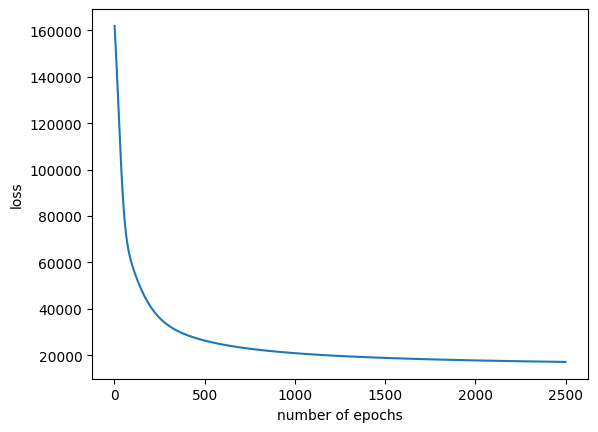

In [ ]:
# Build a logistic regression model.
import math

num_features = len(type_list)
# Mark positive reviews as 1 and negative reviews as 0.
y = [int(l == "positive") for l in sentiment_train]
# Randomize the weights and bias before training.
weights = np.random.rand(num_features)
bias = np.random.rand(1)
# Set the number of iterations or epochs here.
n_iters = 2500
# Set the learning rates.
lr = 0.2
logistic_loss = []
num_samples = len(y)
for i in range(n_iters):
    z = M_train.dot(weights) + bias
    # Compute the probabilities.
    q = 1 / (1 + np.exp(-z))
    # Avoid log(0) for numerical stability.
    eps = 0.00001
    # Compute the binary cross-entropy loss.
    loss = -sum((y * np.log2(q + eps) + (np.ones(len(y)) - y) * np.log2(np.ones(len(y)) - q + eps)))
    # Restore the loss of each iteration.
    logistic_loss.append(loss)

    # Compute the derivatives of weights and bias.
    dw = ((q - y).dot(M_train) * (1 / num_samples))
    db = sum((q - y)) / num_samples
    # Update the weights and bias.
    weights = weights - lr * dw
    bias = bias - lr * db

# Plot the logistic loss related to number of epochs.
plt.plot(range(1, n_iters), logistic_loss[1: ])
plt.xlabel("number of epochs")
plt.ylabel("loss")

# Evaluations of the Model

In [ ]:
z = M_train.dot(weights) + bias
q = 1 / (1 + np.exp(-z))
# Convert probabilities and sentiments to binary labels (0 or 1) for classification.
y_train_pred = [int(ql > 0.5) for ql in q]
y_train = [int(l == "positive") for l in sentiment_train]
# Compute and print the accuracy value for the training dataset.
acc_train = [int(yp == y_train[s]) for s, yp in enumerate(y_train_pred)]
print(f'accuracy_train = {sum(acc_train) / len(acc_train)}')

accuracy_train = 0.818968465695328


In [ ]:
# Calculate and print the precision and recall value of the training dataset.
z = M_train.dot(weights) + bias
q = 1 / (1 + np.exp(-z))
y_train_pred = [int(ql > 0.5) for ql in q]
sentiment_train_pred = ["positive" if s == 1 else "negative" for s in y_train_pred]

true_positives = sum([int(yp == "positive" and sentiment_train[s] == "positive") for s, yp in enumerate(sentiment_train_pred)])
false_positives = sum([int(yp == "positive" and sentiment_train[s] == "negative") for s, yp in enumerate(sentiment_train_pred)])
false_negatives = sum([int(yp == "negative" and sentiment_train[s] == "positive") for s, yp in enumerate(sentiment_train_pred)])
precision_train = true_positives / (true_positives + false_positives)
recall_train = true_positives / (true_positives + false_negatives)
print(f'precision_train = {precision_train}')
print(f'recall_train = {recall_train}')

precision_train = 0.8309793933780968
recall_train = 0.8581505170661725


In [ ]:
# Calculate and print the accuracy value for the testing dataset.
z = M_test.dot(weights) + bias
q = 1 / (1 + np.exp(-z))
y_test_pred = [int(ql > 0.5) for ql in q]
y_test = [int(l == "positive") for l in sentiment_test]
acc_test = [int(yp == y_test[s]) for s, yp in enumerate(y_test_pred)]
print(f'accuracy_test = {sum(acc_test) / len(acc_test)}')

accuracy_test = 0.8179206566347469


In [ ]:
# Compute and print the precision and recall value for the testing dataset.
sentiment_test_pred = ["positive" if s == 1 else "negative" for s in y_test_pred]
true_positives = sum([int(yp == "positive" and sentiment_test[s] == "positive") for s, yp in enumerate(sentiment_test_pred)])
false_positives = sum([int(yp == "positive" and sentiment_test[s] == "negative") for s, yp in enumerate(sentiment_test_pred)])
false_negatives = sum([int(yp == "negative" and sentiment_test[s] == "positive") for s, yp in enumerate(sentiment_test_pred)])
precision_test = true_positives / (true_positives + false_positives)
recall_test = true_positives / (true_positives + false_negatives)
print(f'precision_test = {precision_test}')
print(f'recall_test = {recall_test}')

precision_test = 0.8334860284012826
recall_test = 0.8576478906434126


In [ ]:
# Print the list of 20 words of highest weights on negative sentiments.
[type_list[x] for x in np.argsort(weights)[0:20]]

['disappointed',
 'return',
 'worst',
 'waste',
 'poor',
 'returned',
 'unfortunately',
 'unless',
 'boring',
 'bad',
 'horrible',
 'worse',
 'support',
 'nothing',
 'instead',
 'money',
 'idea',
 'useless',
 'ok',
 'terrible']

In [ ]:
# Print the list of 20 words of highest weights on positive sentiments.
[type_list[x] for x in np.argsort(weights)[::-1][0:20]]

['excellent',
 'perfect',
 'pleased',
 'easy',
 'amazing',
 'awesome',
 'best',
 'grill',
 'wonderful',
 'love',
 'loves',
 'favorite',
 'great',
 'highly',
 'comfortable',
 'fantastic',
 'enjoy',
 'perfectly',
 'pen',
 'job']